In [2]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score,plot_confusion_matrix
from random import randint
import fasttext
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score,classification_report
import pandas as pd

import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import re
from mlxtend.plotting import plot_learning_curves
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import RidgeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt

In [3]:
data = pd.read_json("semeval2017.json")
data

,en,location_en
0,"''I told you not to ride that horse,'' Tom nag...",nagged
1,My name is Neal. I lead prayer groups.,Neal
2,I went to prom with a broken leg. During the s...,crutch
3,The pen is mightier than the sword.,None
4,Tires cost 100 bucks a pop.,pop
...,...,...
4025,A .45 beats a royal flush EVERY TIME,None
4026,Betty Crocker was a flour child.,flour
4027,"Shock me, say something intelligent!",None
4028,"''Give me a haircut,'' Tom said barbarously.",barbarously


In [4]:
#X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
y=[]
for x in data['location_en']:
    if x==None:
        y.append(False)
    else:
        y.append(True)
data['pun_label']=y
data

,en,location_en,pun_label
0,"''I told you not to ride that horse,'' Tom nag...",nagged,True
1,My name is Neal. I lead prayer groups.,Neal,True
2,I went to prom with a broken leg. During the s...,crutch,True
3,The pen is mightier than the sword.,None,False
4,Tires cost 100 bucks a pop.,pop,True
...,...,...,...
4025,A .45 beats a royal flush EVERY TIME,None,False
4026,Betty Crocker was a flour child.,flour,True
4027,"Shock me, say something intelligent!",None,False
4028,"''Give me a haircut,'' Tom said barbarously.",barbarously,True


In [5]:
nltk_tokens=[]
a=[]
b=[]
istrue=False
c=[]
for x in data.en:
    import nltk
    nltk_tokens.append(nltk.word_tokenize(x))
print(nltk_tokens)
for y in range(0,len(nltk_tokens)):
    for x in range(0,len(nltk_tokens[y])):
        if(nltk_tokens[y][x]== data['location_en'][y] and istrue==False):
            c.append(x)
            istrue=True
        a.append(x)
    if(istrue==False):
        c.append(-1)
    b.append(a)
    istrue=False
    a=[]
data["the_indexes"]=b
data["index"]=c
X=b
y=x
data
X=data["index"].values.astype("int").reshape(-1, 1)
y = data["pun_label"].values 

[["''", 'I', 'told', 'you', 'not', 'to', 'ride', 'that', 'horse', ',', "''", 'Tom', 'nagged', '.'], ['My', 'name', 'is', 'Neal', '.', 'I', 'lead', 'prayer', 'groups', '.'], ['I', 'went', 'to', 'prom', 'with', 'a', 'broken', 'leg', '.', 'During', 'the', 'slow', 'dances', 'my', 'date', 'could', 'tell', 'that', 'I', 'had', 'a', 'crutch', 'on', 'her', '.'], ['The', 'pen', 'is', 'mightier', 'than', 'the', 'sword', '.'], ['Tires', 'cost', '100', 'bucks', 'a', 'pop', '.'], ['Cross', 'river', '*', 'THEN', '*', 'insult', 'alligator', '.'], ['A', 'man', "'s", 'best', 'fortune', 'or', 'his', 'worst', 'is', 'a', 'wife', '.'], ['Tread', 'on', 'a', 'worm', 'and', 'it', 'will', 'turn', '.'], ['Nice', 'looking', 'glass', '!', 'said', 'Tom', 'reflectively', '.'], ["Ne'er", 'cast', 'a', 'clout', 'till', 'May', 'be', 'out', '.'], ['A', 'speaker', 'at', 'the', 'firearms', 'convention', 'had', 'to', 'rifle', 'through', 'his', 'notes', '.'], ['Many', 'are', 'content', 'to', 'live', 'in', 'a', 'coal', 'mine'

# RANDOM

Classes:  [False  True]

*--------------------------------------------------*

Score:  0.9937965260545906

*--------------------------------------------------*

Training set score: 0.9966
Test set score: 0.9938

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       237
        True       1.00      0.99      1.00       569

    accuracy                           0.99       806
   macro avg       0.99      1.00      0.99       806
weighted avg       0.99      0.99      0.99       806


*--------------------------------------------------*



/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


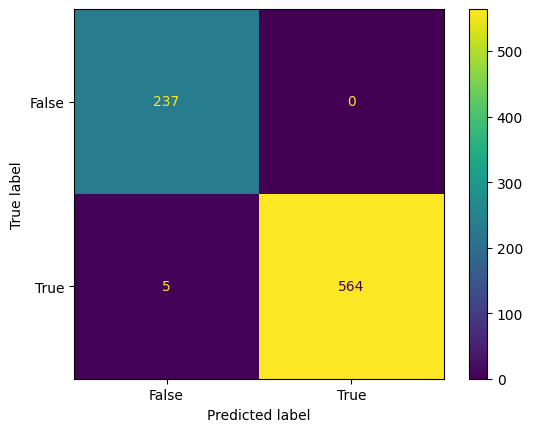

In [6]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
clf=RandomForestClassifier()
clf.fit(X_train, y_train)
pred_labels=clf.predict(X_test)
print("Classes: ",clf.classes_)
score=clf.score(X_test,y_test)
print("\n*--------------------------------------------------*\n")
print("Score: ",score)
print("\n*--------------------------------------------------*\n")
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print("\n*--------------------------------------------------*\n")
print( classification_report(y_test,pred_labels))
print("\n*--------------------------------------------------*\n")
y_pred = clf.predict(X_test)
plot_confusion_matrix(clf,X_test,y_test)

# Naive Bayes

In [7]:
def naive_Bayes(X,y,typ):
    X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
    model=typ
    clf=model.fit(X_train,y_train)
    pred_labels=model.predict(X_test)
    print("Classes: ",clf.classes_)
    print("\n*--------------------------------------------------*\n")
    if str(typ)=='GaussianNB()':
        print("Class Priors: ", clf.class_prior_)
    else:
        print("Class Priors: ", clf.class_log_prior_)
    score=model.score(X_test,y_test)
    print("\n*--------------------------------------------------*\n")
    print("Score: ",score)
    print("\n*--------------------------------------------------*\n")
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    y_pred = clf.predict(X_test)
    plot_confusion_matrix(clf,X_test,y_test)
    return X_train,X_test,y_train,y_test,clf,pred_labels

In [8]:
X.shape


(4030, 1)

Classes:  [False  True]

*--------------------------------------------------*

Class Priors:  [0.28380893 0.71619107]

*--------------------------------------------------*

Score:  0.9937965260545906

*--------------------------------------------------*

Training set score: 0.9966
Test set score: 0.9938

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       237
        True       1.00      0.99      1.00       569

    accuracy                           0.99       806
   macro avg       0.99      1.00      0.99       806
weighted avg       0.99      0.99      0.99       806


*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       237
        True       1.00      0.99      1.00       569

    accuracy                           0.99       806
   macro avg       0.99      1.00      0

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


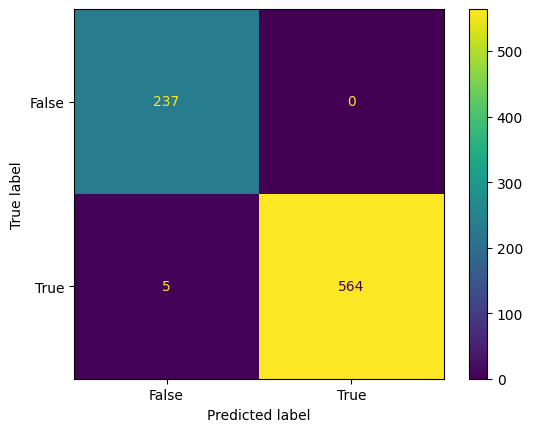

In [9]:
X_train,X_test,y_train,y_test,clf,pred_labels,=naive_Bayes(X,y, GaussianNB())

# TF IDF


*--------------------------------------------------*

Score:  0.9764267990074442

*--------------------------------------------------*

Training set score: 0.9758
Test set score: 0.9764

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       237
        True       1.00      0.99      1.00       569

    accuracy                           0.99       806
   macro avg       0.99      1.00      0.99       806
weighted avg       0.99      0.99      0.99       806


*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       237
        True       1.00      0.99      1.00       569

    accuracy                           0.99       806
   macro avg       0.99      1.00      0.99       806
weighted avg       0.99      0.99      0.99       806


*-----------------------------------------------

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


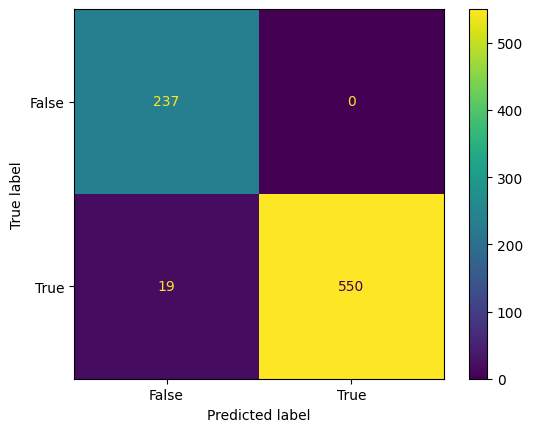

In [10]:
estimators = [("tf_idf", TfidfVectorizer()), 
              ("ridge", linear_model.Ridge())]
model = Pipeline(estimators)
def generic_fun(X,y,typ):
    X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
    model=typ
    clf=model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    pred_labels=model.predict(X_test)
    print("\n*--------------------------------------------------*\n")
    print("Score: ",score)
    print("\n*--------------------------------------------------*\n")
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    plot_confusion_matrix(clf,X_test,y_test)
    return X_train,X_test,y_train,y_test,clf,pred_labels
X_train,X_test,y_train,y_test,clf,pred_labels,=generic_fun(X,y, RidgeClassifier() )


# FastText

In [36]:
pun= data['location_en'] + " " + data['en']
train, test = train_test_split(pun, test_size=0.3, train_size=0.7, random_state=42)
f_train = open("train.txt", "a")
for i in range(len(np.array(train))):
    f_train.write(str(np.array(train)[i]) + "\n")
f_train.close()

f_test = open("test.txt", "a")
for i in range(len(np.array(test))):
    f_test.write(str(np.array(test)[i]) + "\n")
f_test.close()
model = fasttext.train_supervised(input="train.txt")
model.predict("flour")
print(model.test("test.txt") )
text = "coach"
labels, prob = model.predict(text)
print("Label:", labels)
print("Probability:", prob)

(0, nan, nan)
Label: ()
Probability: []


Read 0M words
Number of words:  7722
Number of labels: 0
Progress: 100.0% words/sec/thread: 2151360 lr:  0.000000 avg.loss:       nan ETA:   0h 0m 0s


# Simple Text

In [21]:
from simplet5 import SimpleT5

model = SimpleT5()
train_df, test_df = train_test_split(data[["the_indexes","index"]], test_size=0.2)
model.from_pretrained(model_type="t5", model_name="t5-base")
model.train(train_df=train_df,
            eval_df=test_df, 
            source_max_token_len=128, 
            target_max_token_len=50, 
            batch_size=8, 
            max_epochs=3, 
            use_gpu=True
           )
clf=model.fit(X_train,y_train)
score=model.score(X_test,y_test)
pred_labels=model.predict(X_test)
print("\n*--------------------------------------------------*\n")
print("Score: ",score)
print("\n*--------------------------------------------------*\n")
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
print("\n*--------------------------------------------------*\n")
print( classification_report(y_test,pred_labels))
print("\n*--------------------------------------------------*\n")
print( classification_report(y_test,pred_labels))
print("\n*--------------------------------------------------*\n")

Downloading: 100%|███████████████████████████| 773k/773k [00:00<00:00, 1.35MB/s]
Downloading: 100%|█████████████████████████| 1.32M/1.32M [00:00<00:00, 1.43MB/s]
Downloading: 100%|██████████████████████████| 1.18k/1.18k [00:00<00:00, 338kB/s]
Downloading: 100%|███████████████████████████| 850M/850M [00:54<00:00, 16.4MB/s]


MisconfigurationException: You requested GPUs: [0]
 But your machine only has: []

# MLP


[[ 0.27599637]
 [-1.12964682]
 [-1.12964682]]
Percent:  0.9917287014061208
Training set score: 0.9908
Test set score: 0.9917

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       316
        True       1.00      0.99      1.00       893

    accuracy                           1.00      1209
   macro avg       0.99      1.00      0.99      1209
weighted avg       1.00      1.00      1.00      1209


*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       316
        True       1.00      0.99      1.00       893

    accuracy                           1.00      1209
   macro avg       0.99      1.00      0.99      1209
weighted avg       1.00      1.00      1.00      1209


*--------------------------------------------------*



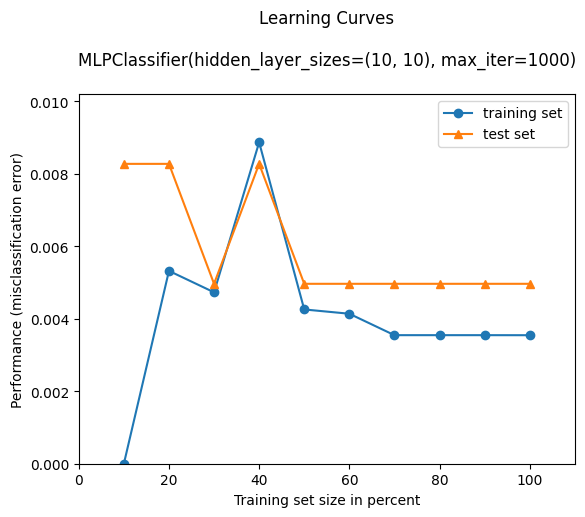

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


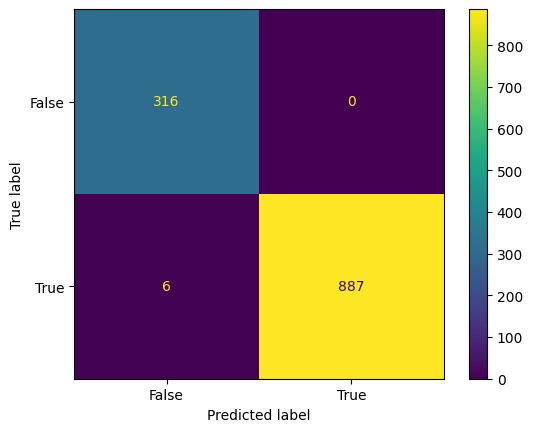

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
def neural_network(hidden_layer_sizes,max_iter,activation,solver,learning_rate,X,y):
    scaler = StandardScaler()

    scaler.fit(X_train)

    train_data = scaler.transform(X_train)
    test_data = scaler.transform(X_test)
    print(train_data[:3])

    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter,
                        activation=activation,
                        solver=solver,
                        learning_rate=learning_rate)

    mlp.fit(train_data, y_train)
    pred_labels=mlp.predict(X_test)
    predictions_train = mlp.predict(train_data)
    predictions_test = mlp.predict(test_data)
    percent = (mlp.score(test_data, y_test))
    print("Percent: ",percent)
    print('Training set score: {:.4f}'.format(mlp.score(train_data, y_train)))
    print('Test set score: {:.4f}'.format(mlp.score(test_data, y_test)))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    plot_learning_curves(X_train, y_train, X_test, y_test,mlp)
    plt.show()
    return ["Neural Network", percent, mlp]
r=neural_network((10, 10),1000,'relu','adam','constant',X,y)
plot_confusion_matrix(r[2],X_test,y_test)

# BLOOM

In [ ]:


configuration = BloomConfig()
model = BloomModel(configuration)

 # Accessing the model configuration
configuration = model.config
